In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHRDfParquet

import pandas as pd
import matplotlib.pyplot as plt


AppleWatchHRDf = getWorkingHRDfParquet('apple')

Text(0.5, 0, 'BPM')

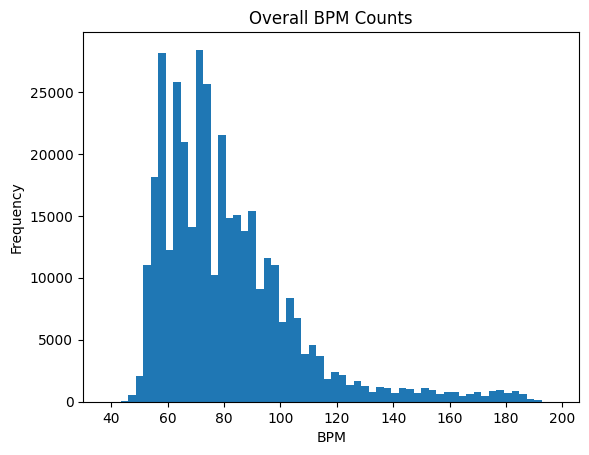

In [2]:
ax = AppleWatchHRDf.value.plot.hist(bins=60, title="Overall BPM Counts")
ax.set_xlabel("BPM")


In [3]:
AppleWatchHRDf

,value
sampleDT,
2021-07-19 19:55:06-07:00,78.0
2021-07-19 19:55:11-07:00,79.0
2021-07-19 19:55:14-07:00,80.0
2021-07-19 19:55:21-07:00,82.0
2021-07-19 19:55:23-07:00,83.0
...,...
2024-08-27 18:45:33-07:00,79.0
2024-08-27 18:45:41-07:00,76.0
2024-08-27 18:45:45-07:00,76.0


In [4]:
AppleWatchHRDf = AppleWatchHRDf.sort_index()

In [5]:
timesSeries = pd.Series(AppleWatchHRDf.index)

In [6]:
betweenMesures = ((timesSeries.shift(-1) - timesSeries)).astype('timedelta64[s]')

In [7]:
betweenMesures

0         5.0
1         3.0
2         7.0
3         2.0
4         7.0
         ... 
371353    8.0
371354    4.0
371355    3.0
371356    8.0
371357    NaN
Name: sampleDT, Length: 371358, dtype: float64

In [8]:
AppleWatchHRDf["timeToNextReading"] = pd.Series(index=AppleWatchHRDf.index, data=betweenMesures.values)

In [9]:
betweenMesures = betweenMesures.dropna()

In [10]:
AppleWatchHRDf = AppleWatchHRDf.dropna()

In [11]:
AppleWatchHRDf

,value,timeToNextReading
sampleDT,,
2021-07-19 19:55:06-07:00,78.0,5.0
2021-07-19 19:55:11-07:00,79.0,3.0
2021-07-19 19:55:14-07:00,80.0,7.0
2021-07-19 19:55:21-07:00,82.0,2.0
2021-07-19 19:55:23-07:00,83.0,7.0
...,...,...
2024-08-27 18:45:31-07:00,79.0,2.0
2024-08-27 18:45:33-07:00,79.0,8.0
2024-08-27 18:45:41-07:00,76.0,4.0


In [12]:
betweenMesures = betweenMesures.sort_values()

In [13]:
betweenMesures

150202          1.0
294130          1.0
294138          1.0
294160          1.0
294173          1.0
            ...    
251506     467762.0
101901     532096.0
292624     787236.0
313894     821233.0
294511    1242634.0
Name: sampleDT, Length: 371357, dtype: float64

Text(0.5, 0, 'Interval (sec)')

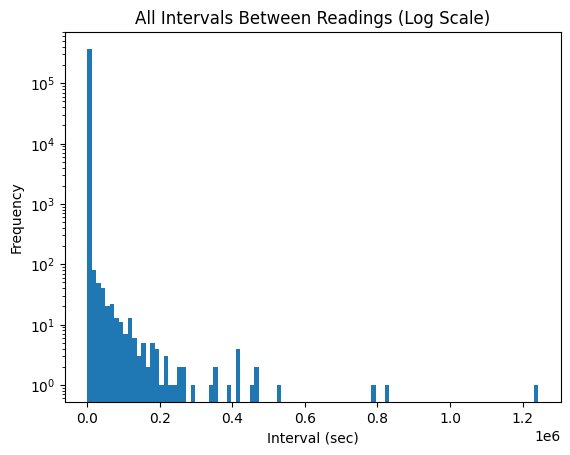

In [14]:
ax = betweenMesures.plot.hist(bins=100, log=True, title="All Intervals Between Readings (Log Scale)")
ax.set_xlabel("Interval (sec)")

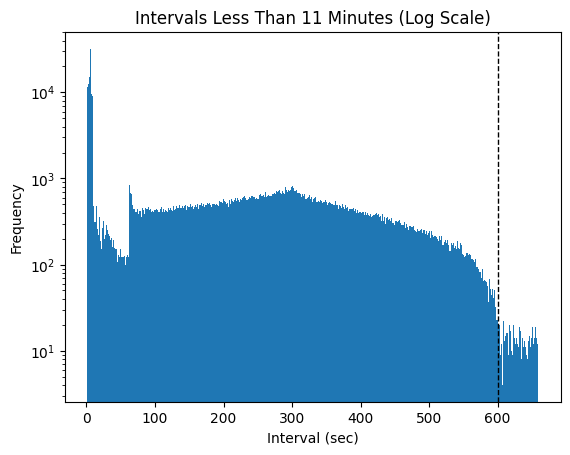

In [15]:
ax = betweenMesures.loc[betweenMesures<660].plot.hist(bins=659, log=True, title="Intervals Less Than 11 Minutes (Log Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

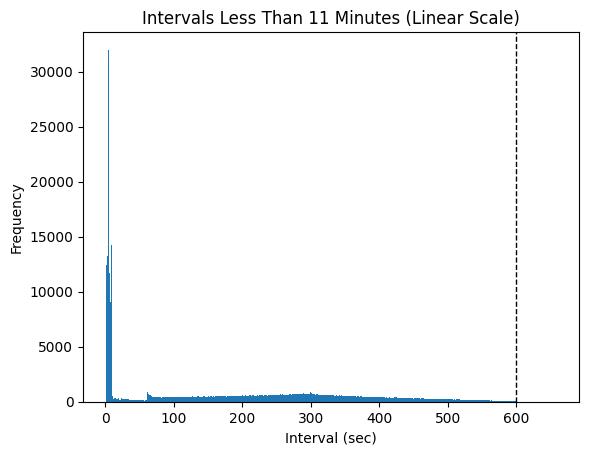

In [16]:
ax = betweenMesures.loc[betweenMesures<660].plot.hist(bins=659, title="Intervals Less Than 11 Minutes (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

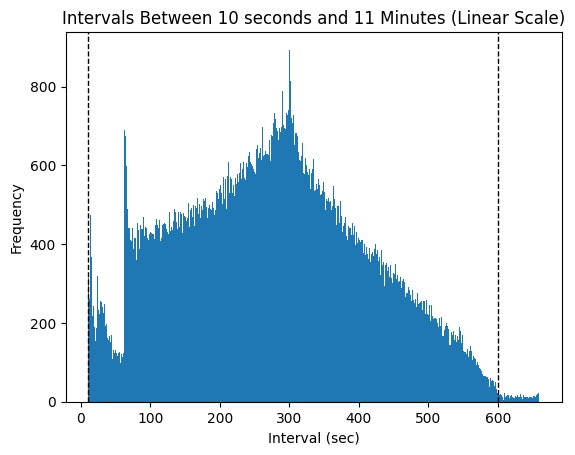

In [17]:
ax = betweenMesures.loc[betweenMesures<660].loc[betweenMesures>10].plot.hist(bins=648, title="Intervals Between 10 seconds and 11 Minutes (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(10, color='k', linestyle='dashed', linewidth=1)
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

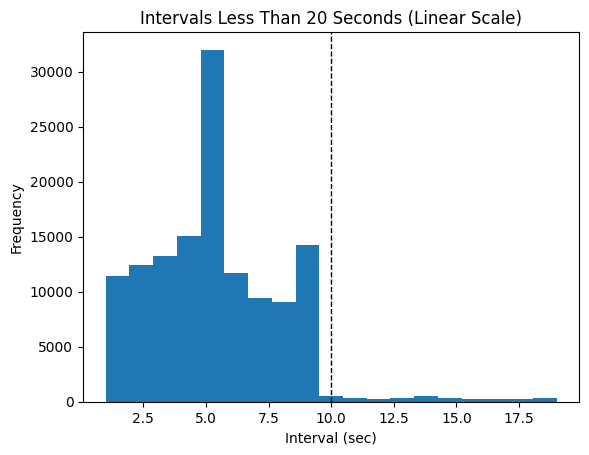

In [18]:
ax = betweenMesures.loc[betweenMesures<20].plot.hist(bins=19, title="Intervals Less Than 20 Seconds (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(10, color='k', linestyle='dashed', linewidth=1)

In [19]:
betweenMesures.describe()

count    3.713570e+05
mean     2.640582e+02
std      4.355975e+03
min      1.000000e+00
25%      6.000000e+00
50%      1.630000e+02
75%      3.170000e+02
max      1.242634e+06
Name: sampleDT, dtype: float64

In [20]:
AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10].value.describe()

count    128662.000000
mean        101.450251
std          26.735434
min          42.000000
25%          84.000000
50%          95.000000
75%         110.000000
max         198.000000
Name: value, dtype: float64

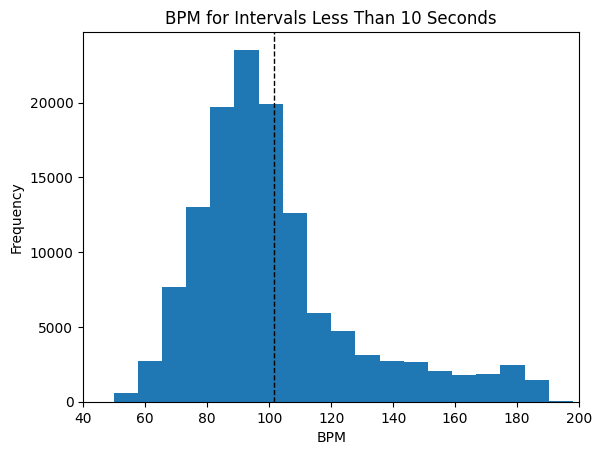

In [21]:
workOutBPMdf = AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10]
ax = workOutBPMdf.value.plot.hist(bins=20, xlim=(40,200), title="BPM for Intervals Less Than 10 Seconds")
ax.set_xlabel("BPM")
ax.axvline(AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10].value.mean(), color='k', linestyle='dashed', linewidth=1)

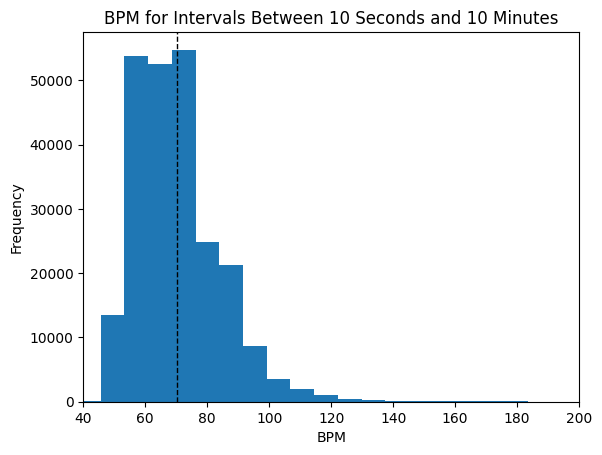

In [22]:
standByBPMdf = AppleWatchHRDf.loc[(AppleWatchHRDf["timeToNextReading"] >= 10) &
                        (AppleWatchHRDf["timeToNextReading"] < 600)]

ax = standByBPMdf.value.plot.hist(bins=20, xlim=(40,200), title="BPM for Intervals Between 10 Seconds and 10 Minutes")
ax.set_xlabel("BPM")
ax.axvline(standByBPMdf.value.mean(), color='k', linestyle='dashed', linewidth=1)

(30.0, 220.0)

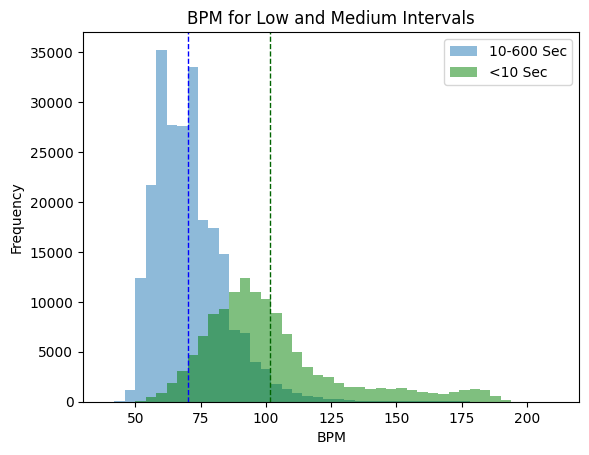

In [30]:
# plt.hist()
ax = standByBPMdf.value.plot.hist(bins=[x for x in range(30,221, (220-30)//40)], xlim=(30,200), alpha=0.5, label="10-600 Sec", title="BPM for Low and Medium Intervals")
ax.hist(workOutBPMdf.value, bins=[x for x in range(30,221, (220-30)//40)], alpha=0.5, color="g", label="<10 Sec")
ax.set_xlabel("BPM")
ax.axvline(standByBPMdf.value.mean(), color='b', linestyle='dashed', linewidth=1)
ax.axvline(workOutBPMdf.value.mean(), color='darkgreen', linestyle='dashed', linewidth=1)
ax.legend(loc='upper right') 
ax.set_xlim(30,220)

In [24]:
combodf = pd.DataFrame(workOutBPMdf.append(standByBPMdf))
combodf

,value,timeToNextReading
sampleDT,,
2021-07-19 19:55:06-07:00,78.0,5.0
2021-07-19 19:55:11-07:00,79.0,3.0
2021-07-19 19:55:14-07:00,80.0,7.0
2021-07-19 19:55:21-07:00,82.0,2.0
2021-07-19 19:55:23-07:00,83.0,7.0
...,...,...
2024-08-27 10:02:39-07:00,64.0,156.0
2024-08-27 10:16:17-07:00,102.0,19.0
2024-08-27 10:51:07-07:00,99.0,14.0


In [25]:
combodf["highR"] = combodf["timeToNextReading"] < 10
combodf

,value,timeToNextReading,highR
sampleDT,,,
2021-07-19 19:55:06-07:00,78.0,5.0,True
2021-07-19 19:55:11-07:00,79.0,3.0,True
2021-07-19 19:55:14-07:00,80.0,7.0,True
2021-07-19 19:55:21-07:00,82.0,2.0,True
2021-07-19 19:55:23-07:00,83.0,7.0,True
...,...,...,...
2024-08-27 10:02:39-07:00,64.0,156.0,False
2024-08-27 10:16:17-07:00,102.0,19.0,False
2024-08-27 10:51:07-07:00,99.0,14.0,False


In [26]:
# import seaborn as sns
# sns.set_style("dark")
# sns.histplot(data=combodf, x="value", hue="highR", bins=20)
# sns.axvline(standByBPMdf.value.mean(), color='k', linestyle='dashed', linewidth=1)

In [27]:
AppleWatchHRDf.loc[(AppleWatchHRDf["timeToNextReading"] >= 10) &
                   (AppleWatchHRDf["timeToNextReading"] < 600)].value.describe()

count    237393.000000
mean         70.333691
std          13.886127
min          38.000000
25%          60.000000
50%          68.000000
75%          78.000000
max         191.000000
Name: value, dtype: float64

In [28]:
import matplotlib as mpl

mpl.rc_file_defaults()